# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [62]:
url = "http://api.openweathermap.org/data/2.5/weather?"
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []
city_id=[]
good_city=[]

no_city = []

units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        good_city.append(weather_response['name'])
        city_id.append(weather_response['weather'][0]['id'])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]['lon'])
        temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        
    except KeyError:
        print(f"We can't find city: {city}.")
        if city not in no_city:
            no_city.append(city)


We can't find city: taburi.
We can't find city: mys shmidta.
We can't find city: tingrela.
We can't find city: kuche.
We can't find city: bolungarvik.
We can't find city: saleaula.
We can't find city: illoqqortoormiut.


KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
weather_dict = {
    "City": good_city,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data


# weather_dict

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jinxiang,27.4327,120.6062,8.70,73,98,5.13,CN,1612828268
1,Punta Arenas,-53.1500,-70.9167,18.00,59,0,5.66,CL,1612828221
2,Castro,-24.7911,-50.0119,16.00,91,35,3.40,BR,1612828037
3,Sitka,57.0531,-135.3300,-4.00,50,90,5.66,US,1612828268
4,Iberia,29.9502,-91.7507,21.00,73,75,4.12,US,1612828248
5,Busselton,-33.6500,115.3333,16.11,96,93,0.45,AU,1612828118
6,Saint-Philippe,-21.3585,55.7679,25.00,57,20,3.09,RE,1612828268
7,Korgen,66.0771,13.8153,-7.78,83,99,1.34,NO,1612828268
8,Souillac,-20.5167,57.5167,25.00,88,40,1.54,MU,1612828268
9,Nikolskoye,59.7035,30.7861,-15.00,85,90,2.00,RU,1612828130


In [64]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01
mean,8.537177,3.061268,13.663404,74.936170,58.744681,4.382128,1.612828e+09
std,36.795189,103.177337,16.804493,15.906526,37.275396,3.168686,6.317238e+01
min,-54.800000,-175.200000,-33.170000,18.000000,0.000000,0.450000,1.612828e+09
25%,-20.858350,-73.685000,8.250000,68.000000,20.000000,1.845000,1.612828e+09
50%,3.456800,4.419200,18.330000,77.000000,75.000000,3.710000,1.612828e+09
75%,30.069950,114.083300,25.440000,86.000000,90.000000,6.070000,1.612828e+09
max,77.484000,168.864300,30.000000,100.000000,100.000000,16.460000,1.612828e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [65]:
weather_data[weather_data['Humidity'] > 100] 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

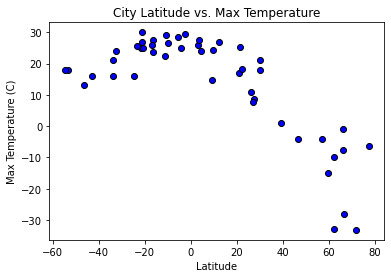

This graph is showing the relationship between latitude and maximum temperature. This graph shows that temperatures tend to be higher closer to the equator. 


In [66]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']

plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")

plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

plt.show()

print("This graph is showing the relationship between latitude and maximum temperature. This graph shows that temperatures tend to be higher closer to the equator. ")

## Latitude vs. Humidity Plot

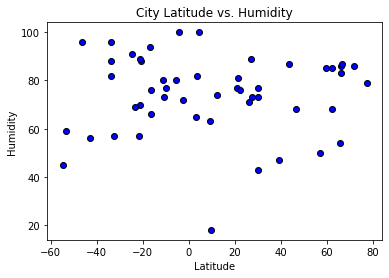

In [60]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']

plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")

plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()
print("This graph is showing the relationship between latitude and humidity. This graph shows that there is not a strong relationship between latitude and humidity.")

## Latitude vs. Cloudiness Plot

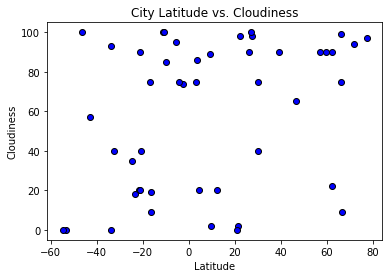

This graph is showing the relationship between latitude and cloudiness. This graph shows that there is not a strong relationship between latitude and cloudiness.


In [68]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']

plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")

plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()
print("This graph is showing the relationship between latitude and cloudiness. This graph shows that there is not a strong relationship between latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

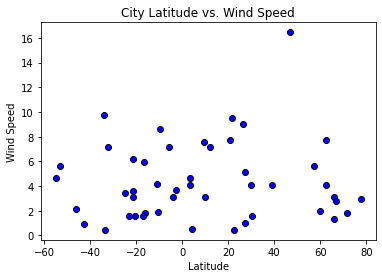

This graph is showing the relationship between latitude and wind speed. This graph shows that there is not a strong relationship between latitude and wind speed.


In [70]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']

plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")

plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()
print("This graph is showing the relationship between latitude and wind speed. This graph shows that there is not a strong relationship between latitude and wind speed.")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


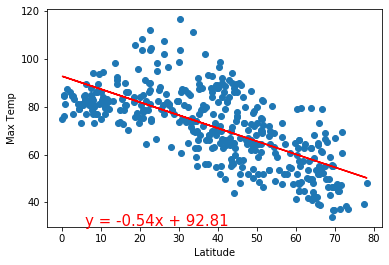

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


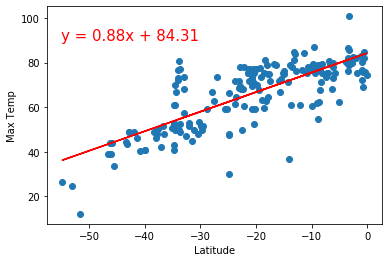

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


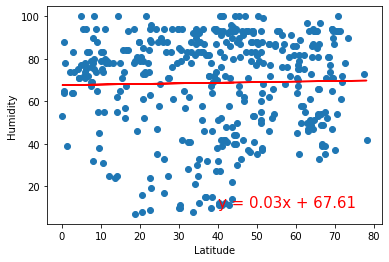

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


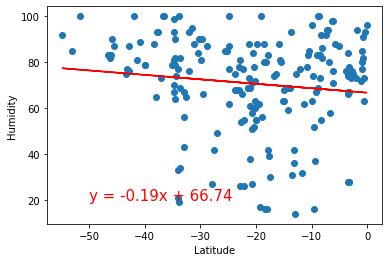

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


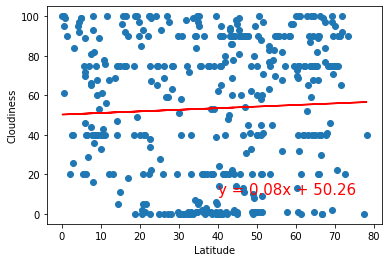

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


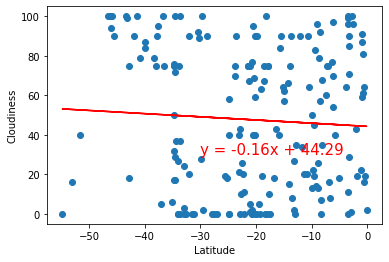

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


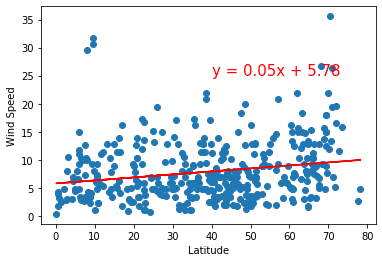

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


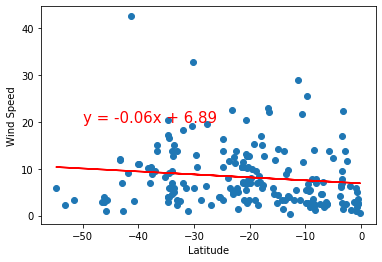